In [2]:
#%run /home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/modulos/funciones/02_funciones_autonomia_economica.ipynb
%run /Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/modulos/funciones/02_funciones_autonomia_economica.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

In [3]:
# Definimos path
pathdata = '/home/daniu/Documentos/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'


In [4]:
with open(pathdata + 'modulos/diccionarios/' + 'diccionario_aglomerados.pickle', 'rb') as file:
    dict_cod_aglomerado = pickle.load(file)

with open(pathdata + 'modulos/diccionarios/' + 'diccionario_provincia.pickle', 'rb') as file:
    dict_cod_provincia = pickle.load(file)

with open(pathdata + 'modulos/diccionarios/' + 'diccionario_aglomerado_provincia.pickle', 'rb') as file:
    map_aglomerado_provincia = pickle.load(file)

with open(pathdata + 'modulos/diccionarios/' + 'diccionario_aglomerado_region.pickle', 'rb') as file:
    map_aglomerado_region = pickle.load(file)

with open(pathdata + 'modulos/diccionarios/' + 'diccionario_provincia_region.pickle', 'rb') as file:
    map_provincia_region = pickle.load(file)

In [5]:
df_people_pool = pd.read_csv(pathdata + 'data_output/Base_pool_individuos_solo_con_replicas_actuales.csv', low_memory=False, index_col=0)
df_houses_pool = pd.read_csv(pathdata + 'data_output/Base_pool_hogares_solo_con_replicas_actuales.csv', low_memory=False, index_col=0)

In [8]:
tasa, size, ratio, error = poblacion_inactiva_con_ingresos(df_people_pool, tipo='Urbano', base='Individual', confidence_level=0.95, pool=True)
dependientes_con_ingreso = pd.concat([tasa, size, ratio, error], axis=1)

In [10]:
df_temp = df_people_pool[df_people_pool['CH06'] >= 14].copy()
df_inactivos_sin_ingreso = df_temp[(df_temp['ESTADO']==3) & (df_temp['P47T']==0) & (df_temp['CAT_INAC']!=3)][['PONDII_new', 'CH06', 'P47T', 'CH04', 'IPCF']]
df_inactivos_sin_ingreso['IPCF'] = df_inactivos_sin_ingreso['IPCF'].str.replace(',', '.').astype(float)

In [11]:
repeated_values = np.repeat(df_inactivos_sin_ingreso['IPCF'], df_inactivos_sin_ingreso['PONDII_new'])

quintiles = np.percentile(repeated_values, q=[0, 20, 40, 60, 80, 100])

quintiles[1] = 0.1
df_inactivos_sin_ingreso['Quintil'] = pd.cut(df_inactivos_sin_ingreso['IPCF'], bins=quintiles, include_lowest=True)

result = df_inactivos_sin_ingreso.groupby(['CH04', 'Quintil'])['CH06'].mean()


In [12]:
result

CH04  Quintil            
1     (-0.001, 0.1]          35.664894
      (0.1, 10125.0]         30.348276
      (10125.0, 20600.0]     33.671875
      (20600.0, 33900.0]     34.549550
      (33900.0, 500000.0]    34.564987
2     (-0.001, 0.1]          44.162369
      (0.1, 10125.0]         36.762799
      (10125.0, 20600.0]     38.251874
      (20600.0, 33900.0]     40.992617
      (33900.0, 500000.0]    44.272180
Name: CH06, dtype: float64

In [13]:
df_inactivos_sin_ingreso[['IPCF', 'PONDII_new']]

,IPCF,PONDII_new
3,30000.00,680.930194
17,0.00,682.138588
21,8000.00,710.535854
33,15666.67,761.892613
54,45000.00,1460.344524
...,...,...
72343,18563.64,288.453737
72347,18563.64,288.453737
72348,18563.64,288.453737
72352,7466.67,206.804642


array([[<AxesSubplot:title={'center':'PONDII_new'}>]], dtype=object)

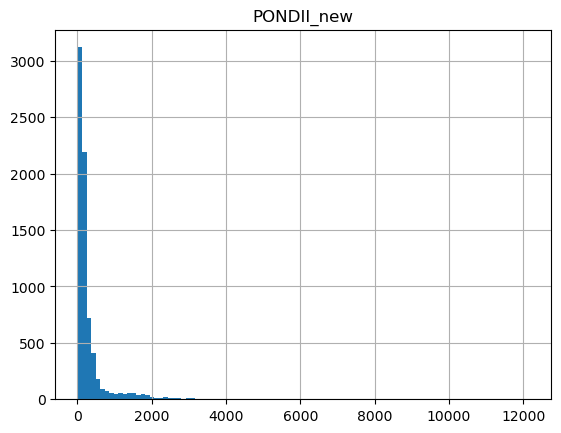

In [43]:
df_inactivos_sin_ingreso[['IPCF', 'PONDII_new']].hist(bins=100)

In [28]:
import plotly.graph_objects as go
import plotly.express as px


In [30]:
fig = px.histogram(df_inactivos, x="P47T", y="PONDII_new", color="CH04", marginal="rug",
                   hover_data=df_inactivos.columns)

file_path = pathdata + 'figs/'
filename = 'panel-inactivos-pool.html'
fig.write_html(file_path + filename)

In [31]:
fig = px.histogram(df_inactivos[df_inactivos['P47T']==0], x="CH06", y="PONDERA_new", color="CH04", marginal="rug",
                   hover_data=df_inactivos[df_inactivos['P47T']==0].columns)

file_path = pathdata + 'figs/'
filename = 'panel-inactivos-pool_sin_ingreso.html'
fig.write_html(file_path + filename)

In [32]:
fig = px.histogram(df_inactivos[df_inactivos['P47T']>0], x="CH06", y="PONDERA_new", color="CH04", marginal="rug",
                   hover_data=df_inactivos[df_inactivos['P47T']>0].columns)

file_path = pathdata + 'figs/'
filename = 'panel-inactivos-pool_con_ingreso.html'
fig.write_html(file_path + filename)